<a href="https://colab.research.google.com/github/msolorzan/TensorFlow-projects/blob/main/2_Classification_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_moons
import numpy as np

In [ ]:
X, y= make_moons(n_samples = 100, noise = 0.2, random_state = 0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data = pd.DataFrame({'X0' : X[:, 0], 'X1' : X[:,1], 'Labels' : y})
data

,X0,X1,Labels
0,-0.010944,0.989785,0
1,1.967499,-0.110922,1
2,0.918923,-0.007878,0
3,-0.019781,0.036742,1
4,0.897047,-0.526043,1
...,...,...,...
95,1.793488,0.494760,1
96,0.324903,-0.563881,1
97,0.760780,-0.373788,1
98,-1.209597,0.324701,0


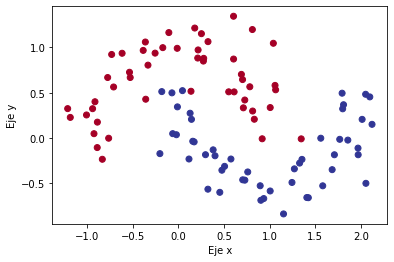

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (2,1)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
model_1.fit(X, y, epochs = 80)

Epoch 1/80
4/4 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.5100
Epoch 2/80
4/4 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5500
Epoch 3/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5600
Epoch 4/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5700
Epoch 5/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5800
Epoch 6/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5800
Epoch 7/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.6000
Epoch 8/80
4/4 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.6100
Epoch 9/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.6400
Epoch 10/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.7200
Epoch 11/80
4/4 [======================

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7

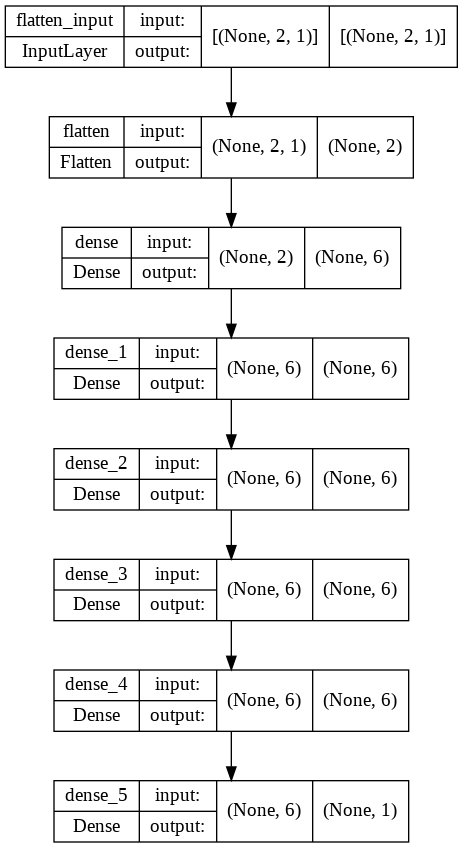

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes = True)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_set, train_label), (test_set, test_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_set.shape, train_label.shape, test_set.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

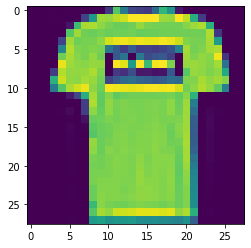

In [ ]:
plt.imshow(train_set[np.random.randint(0, 9)])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
norm_train_set = train_set / train_set.max()
norm_test_set = test_set / test_set.max()

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ['accuracy']
)

# Fit the model
history = model_2.fit(norm_train_set, train_label, epochs = 20, validation_data = (norm_test_set, test_label))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5836 - accuracy: 0.7996 - val_loss: 0.4599 - val_accuracy: 0.8346
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4047 - accuracy: 0.8557 - val_loss: 0.4679 - val_accuracy: 0.8368
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3622 - accuracy: 0.8688 - val_loss: 0.4180 - val_accuracy: 0.8488
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8779 - val_loss: 0.4035 - val_accuracy: 0.8552
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3183 - accuracy: 0.8835 - val_loss: 0.3910 - val_accuracy: 0.8622
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.8900 - val_loss: 0.3764 - val_accuracy: 0.8647
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2915 - accuracy: 0.8924 - val_loss: 0.3730 - val_accuracy

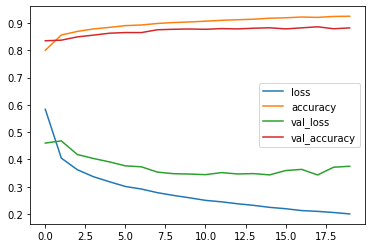

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
y_probs = model_2.predict(norm_test_set)
y_probs, y_probs.shape

(array([[1.9112166e-07, 1.2390103e-15, 6.5331568e-10, ..., 3.6543466e-03,
         1.1258444e-06, 9.9626797e-01],
        [2.9175053e-06, 2.7110126e-16, 9.9752802e-01, ..., 1.7707356e-18,
         1.9386539e-11, 9.9701088e-23],
        [7.8985048e-11, 1.0000000e+00, 2.9738274e-18, ..., 3.9161548e-34,
         6.9946558e-19, 1.3594792e-31],
        ...,
        [2.0603869e-04, 9.3612271e-11, 6.2389859e-07, ..., 8.1373855e-06,
         9.9978083e-01, 1.4524257e-09],
        [2.4105327e-09, 1.0000000e+00, 6.4221732e-11, ..., 1.1661773e-25,
         6.2046248e-14, 8.0965066e-26],
        [1.2001073e-04, 1.5133306e-10, 2.6053758e-05, ..., 1.7301843e-04,
         1.3065816e-05, 5.7740355e-09]], dtype=float32), (10000, 10))

In [ ]:
y_preds = y_probs.argmax(axis = 1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

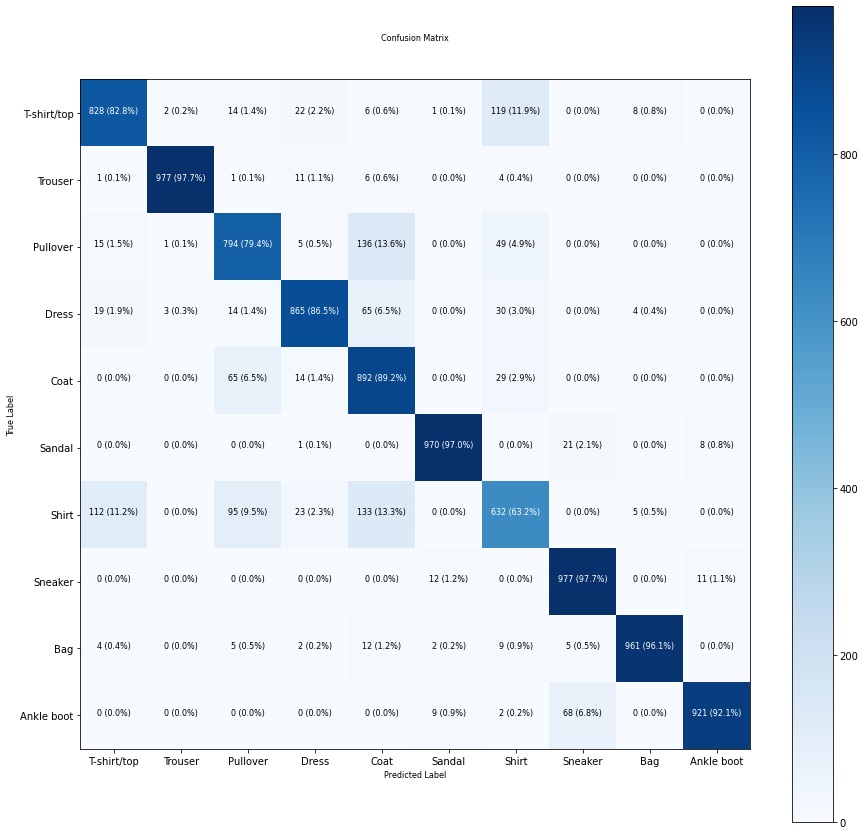

In [ ]:
make_confusion_matrix(
    y_true = test_label,
    y_pred = y_preds,
    classes = class_names,
    figsize = (15, 15),
    text_size = 8
)

In [ ]:
import numpy as np
import tensorflow as tf
def softmax(dataset):
  dataset = tf.cast(dataset, dtype = tf.float16)
  exp = tf.math.exp(dataset)
  sum_exp = tf.math.reduce_sum(exp)
  soft = exp / sum_exp
  return soft

In [ ]:
softmax([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])

<tf.Tensor: shape=(7,), dtype=float16, numpy=
array([0.02365, 0.06433, 0.1747 , 0.475  , 0.02365, 0.06433, 0.1747 ],
      dtype=float16)>

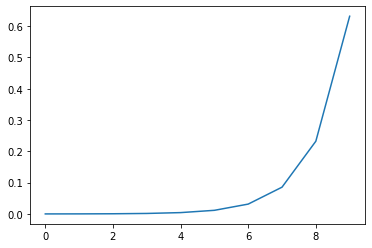

In [ ]:
plt.plot(softmax(tf.range(10)))

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

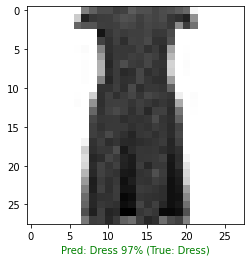

In [ ]:
plot_random_image(
    model = model_2,
    images = norm_test_set,
    true_labels = test_label,
    classes = class_names
)

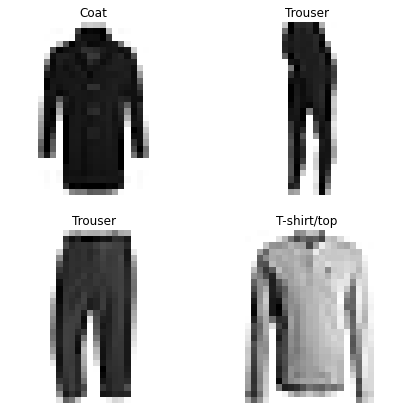

In [ ]:
# Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_set)))
  plt.imshow(train_set[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis(False)

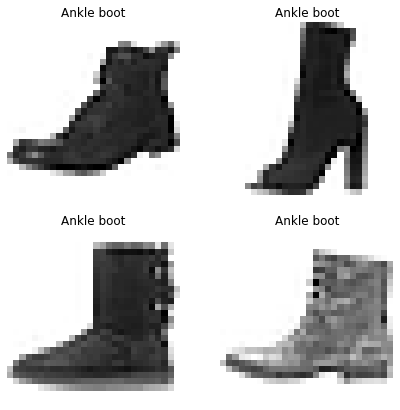

In [ ]:
plt.figure(figsize=(7, 7))

rand_index = another_rand_index = random.choice(range(len(train_set)))

for i in range(4):
  while(class_names[train_label[another_rand_index]] != class_names[train_label[rand_index]]):
    another_rand_index = random.choice(range(len(train_set)))
  ax = plt.subplot(2, 2, i+1)
  plt.imshow(train_set[another_rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_label[another_rand_index]])
  plt.axis(False)
  another_rand_index = random.choice(range(len(train_set)))